In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Time    : 2020/1/13 16:28
# @Author  : Shark
# @Site    :
# @File    : tsts_trainer.py
# @Software: PyCharm

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "6"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# On CPU/GPU placement
config = tf.compat.v1.ConfigProto(allow_soft_placement=True, log_device_placement=True)
config.gpu_options.allow_growth = True
tf.compat.v1.Session(config=config)


2.0.0
Num GPUs Available:  1
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: TITAN RTX, pci bus id: 0000:0c:00.0, compute capability: 7.5



In [2]:
from kashgari.trainer.sampler_multi_task_trainer import SamplerMultiTaskTrainer
from kashgari.task import ReadabilityTask, NerTask, AlluSourceTask,AlluClassTask
from kashgari.processors import ClassificationProcessor, LabelingProcessor

poem_seq_len = 30
task_list = []
processor = LabelingProcessor(vocab_path="../pretrained_embedding/bert/poem_chinese_L-12_H-768_A-12/")
ner_task = NerTask(processor,
                   "./allusion_corpus",
                   poem_seq_len,
                   num_samples=3000)
task_list.append(ner_task)



processor = ClassificationProcessor(vocab_path="../pretrained_embedding/bert/poem_chinese_L-12_H-768_A-12/")
allu_class_task = AlluClassTask(processor,
                                "./allusion_corpus",
                                poem_seq_len)
task_list.append(allu_class_task)



processor = ClassificationProcessor(vocab_path="../pretrained_embedding/bert/poem_chinese_L-12_H-768_A-12/")
readability_task = ReadabilityTask(processor,
                                   "./allusion_corpus",
                                   poem_seq_len)
task_list.append(readability_task)


processor = ClassificationProcessor(vocab_path="../pretrained_embedding/bert/poem_chinese_L-12_H-768_A-12/")
allu_source_task = AlluSourceTask(processor,
                                  "./allusion_corpus",
                                  poem_seq_len,
                                  num_samples=30000)
task_list.append(allu_source_task)


Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: TITAN RTX, pci bus id: 0000:0c:00.0, compute capability: 7.5



I:LOAD NER CORPUS:[ner_task.p: 65]:loaded 21596 samples from ./allusion_corpus/train.data. Samples:
x[0]: ['纶', '綍', '谋', '猷', '盛', ',', '丹', '青', '步', '武', '亲', '。']
y[0]: ['B-ALLU', 'I-ALLU', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [3]:
allu_def_seq_len = poem_seq_len
trainer = SamplerMultiTaskTrainer(task_list=task_list,
                                  batch_size=64,
                                  total_epochs=50,
                                  poem_seq_len=poem_seq_len,
                                  allu_def_seq_len=allu_def_seq_len)

final_res = trainer.train()


I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	32 training batches
I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	10 test batches
I:BASE TASK:[base_task.:270]:Task ALLU_CLASS:
I:BASE TASK:[base_task.:271]:	29 training batches
I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	9 test batches
I:BASE TASK:[base_task.:270]:Task READABILITY:
I:BASE TASK:[base_task.:271]:	21 training batches
I:BASE TASK:[base_task.:272]:	4 validation batches
I:BASE TASK:[base_task.:273]:	6 test batches
I:BASE TASK:[base_task.:270]:Task ALLU_SOURCE:
I:BASE TASK:[base_task.:271]:	64 training batches
I:BASE TASK:[base_task.:272]:	12 validation batches
I:BASE TASK:[base_task.:273]:	94 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:0:[sampler_mu: 92]:Set up ready. Begining training/val

Epoch 1/50
146/146 [==============================] - 210s 1s/step - task_name: READABILITY - loss: 0.8327 - accuracy: 0.5477 - val_loss: 0.8521 - val_accuracy: 0.6406


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
146/146 [==============================] - 59s 401ms/step - task_name: READABILITY - loss: 0.8311 - accuracy: 0.6706 - val_loss: 0.7909 - val_accuracy: 0.6836


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
146/146 [==============================] - 51s 346ms/step - task_name: READABILITY - loss: 0.6353 - accuracy: 0.7016 - val_loss: 0.8668 - val_accuracy: 0.6250


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
146/146 [==============================] - 46s 315ms/step - task_name: READABILITY - loss: 0.5598 - accuracy: 0.7461 - val_loss: 0.9050 - val_accuracy: 0.6367


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
145/146 [============================>.] - ETA: 0s - task_name:     NER     - loss: 4.6277 - accuracy: 0.8156
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
146/146 [==============================] - 49s 332ms/step - task_name: READABILITY - loss: 0.5580 - accuracy: 0.7597 - val_loss: 0.8899 - val_accuracy: 0.6445


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
145/146 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.4399 - accuracy: 0.7547
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
146/146 [==============================] - 48s 330ms/step - task_name: READABILITY - loss: 0.5830 - accuracy: 0.7599 - val_loss: 0.8936 - val_accuracy: 0.6484


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
146/146 [==============================] - 42s 290ms/step - task_name: READABILITY - loss: 0.4267 - accuracy: 0.8141 - val_loss: 0.9938 - val_accuracy: 0.6289


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
145/146 [============================>.] - ETA: 0s - task_name: ALLU_CLASS  - loss: 1.1730 - accuracy: 0.5831
Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
146/146 [==============================] - 46s 313ms/step - task_name: READABILITY - loss: 0.2921 - accuracy: 0.8375 - val_loss: 1.1033 - val_accuracy: 0.5977


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
146/146 [==============================] - 43s 293ms/step - task_name: READABILITY - loss: 0.3887 - accuracy: 0.8615 - val_loss: 1.0697 - val_accuracy: 0.6328


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
145/146 [============================>.] - ETA: 0s - task_name: ALLU_CLASS  - loss: 1.3665 - accuracy: 0.5432
Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
146/146 [==============================] - 36s 244ms/step - task_name: ALLU_CLASS  - loss: 0.7927 - accuracy: 0.5432 - val_loss: 2.5407 - val_accuracy: 0.2812


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
145/146 [============================>.] - ETA: 0s - task_name:     NER     - loss: 4.0339 - accuracy: 0.8285
Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
146/146 [==============================] - 38s 260ms/step - task_name: ALLU_CLASS  - loss: 1.2264 - accuracy: 0.6051 - val_loss: 2.5689 - val_accuracy: 0.3099


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 12/50
146/146 [==============================] - 41s 278ms/step - task_name: ALLU_CLASS  - loss: 0.8422 - accuracy: 0.6406 - val_loss: 2.5919 - val_accuracy: 0.2969


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 13/50
146/146 [==============================] - 30s 204ms/step - task_name: ALLU_SOURCE - loss: 0.3301 - accuracy: 0.8714 - val_loss: 1.0040 - val_accuracy: 0.6055 


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 14/50
146/146 [==============================] - 11s 79ms/step - task_name:     NER     - loss: 3.9693 - accuracy: 0.8320 - val_loss: 10.9348 - val_accuracy: 0.8025


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 15/50
146/146 [==============================] - 12s 83ms/step - task_name:     NER     - loss: 4.1943 - accuracy: 0.8381 - val_loss: 10.8359 - val_accuracy: 0.8051


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 16/50
145/146 [============================>.] - ETA: 0s - task_name:     NER     - loss: 3.5034 - accuracy: 0.8463
Epoch 00016: ReduceLROnPlateau reducing learning rate to 0.00034300000406801696.
146/146 [==============================] - 12s 84ms/step - task_name:     NER     - loss: 4.2004 - accuracy: 0.8459 - val_loss: 10.7668 - val_accuracy: 0.8090


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 17/50
146/146 [==============================] - 11s 72ms/step - task_name:     NER     - loss: 3.3216 - accuracy: 0.8477 - val_loss: 10.7606 - val_accuracy: 0.8075


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 18/50
146/146 [==============================] - 11s 76ms/step - task_name:     NER     - loss: 3.5618 - accuracy: 0.8533 - val_loss: 10.7122 - val_accuracy: 0.8034


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 19/50
146/146 [==============================] - 9s 64ms/step - task_name:     NER     - loss: 2.4991 - accuracy: 0.8530 - val_loss: 10.6814 - val_accuracy: 0.8046


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 20/50
146/146 [==============================] - 13s 86ms/step - task_name:     NER     - loss: 4.0590 - accuracy: 0.8562 - val_loss: 10.6149 - val_accuracy: 0.8056


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 21/50
146/146 [==============================] - 9s 65ms/step - task_name:     NER     - loss: 2.6919 - accuracy: 0.8563 - val_loss: 10.6130 - val_accuracy: 0.8044


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 22/50
145/146 [============================>.] - ETA: 0s - task_name:     NER     - loss: 3.2807 - accuracy: 0.8595
Epoch 00022: ReduceLROnPlateau reducing learning rate to 0.00024009999469853935.
146/146 [==============================] - 11s 76ms/step - task_name:     NER     - loss: 3.3307 - accuracy: 0.8595 - val_loss: 10.5883 - val_accuracy: 0.8042


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 23/50
146/146 [==============================] - 8s 55ms/step - task_name:     NER     - loss: 2.8725 - accuracy: 0.8643 - val_loss: 10.6311 - val_accuracy: 0.8058


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 24/50
146/146 [==============================] - 13s 90ms/step - task_name:     NER     - loss: 3.8151 - accuracy: 0.8659 - val_loss: 10.5553 - val_accuracy: 0.8033


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 25/50
139/146 [===========================>..] - ETA: 0s - task_name:     NER     - loss: 3.0700 - accuracy: 0.8666
Epoch 00025: ReduceLROnPlateau reducing learning rate to 0.00016806999628897755.
146/146 [==============================] - 9s 63ms/step - task_name:     NER     - loss: 3.3548 - accuracy: 0.8666 - val_loss: 10.5735 - val_accuracy: 0.8045


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 26/50
146/146 [==============================] - 10s 68ms/step - task_name:     NER     - loss: 2.6396 - accuracy: 0.8703 - val_loss: 10.4897 - val_accuracy: 0.8033


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 27/50
146/146 [==============================] - 7s 49ms/step - task_name:     NER     - loss: 2.4952 - accuracy: 0.8705 - val_loss: 10.5605 - val_accuracy: 0.8040


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 28/50
146/146 [==============================] - 9s 60ms/step - task_name:     NER     - loss: 2.1528 - accuracy: 0.8700 - val_loss: 10.4836 - val_accuracy: 0.8034


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 29/50
146/146 [==============================] - 9s 65ms/step - task_name:     NER     - loss: 3.2506 - accuracy: 0.8741 - val_loss: 10.4914 - val_accuracy: 0.8029


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 30/50
146/146 [==============================] - 11s 74ms/step - task_name:     NER     - loss: 2.8340 - accuracy: 0.8753 - val_loss: 10.4464 - val_accuracy: 0.8061


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 31/50
134/146 [==========================>...] - ETA: 0s - task_name:     NER     - loss: 2.6378 - accuracy: 0.8777
Epoch 00031: ReduceLROnPlateau reducing learning rate to 0.00011764899536501615.
146/146 [==============================] - 11s 73ms/step - task_name:     NER     - loss: 2.7103 - accuracy: 0.8784 - val_loss: 10.4055 - val_accuracy: 0.8038


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 32/50
146/146 [==============================] - 11s 75ms/step - task_name:     NER     - loss: 2.7847 - accuracy: 0.8768 - val_loss: 10.3177 - val_accuracy: 0.8044


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 33/50
146/146 [==============================] - 8s 57ms/step - task_name:     NER     - loss: 2.6518 - accuracy: 0.8812 - val_loss: 10.3776 - val_accuracy: 0.8046


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 34/50
140/146 [===========================>..] - ETA: 0s - task_name:     NER     - loss: 2.8002 - accuracy: 0.8806
Epoch 00034: ReduceLROnPlateau reducing learning rate to 8.235429777414538e-05.
146/146 [==============================] - 9s 65ms/step - task_name:     NER     - loss: 3.0565 - accuracy: 0.8806 - val_loss: 10.3824 - val_accuracy: 0.8052


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 35/50
146/146 [==============================] - 10s 68ms/step - task_name:     NER     - loss: 3.2017 - accuracy: 0.8819 - val_loss: 10.4107 - val_accuracy: 0.8048


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 36/50
146/146 [==============================] - 12s 81ms/step - task_name:     NER     - loss: 3.8857 - accuracy: 0.8816 - val_loss: 10.4123 - val_accuracy: 0.8044


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 37/50
143/146 [============================>.] - ETA: 0s - task_name:     NER     - loss: 2.6846 - accuracy: 0.8806
Epoch 00037: ReduceLROnPlateau reducing learning rate to 5.76480058953166e-05.
146/146 [==============================] - 9s 62ms/step - task_name:     NER     - loss: 2.8494 - accuracy: 0.8806 - val_loss: 10.4260 - val_accuracy: 0.8052


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 38/50
146/146 [==============================] - 10s 67ms/step - task_name:     NER     - loss: 3.0557 - accuracy: 0.8870 - val_loss: 10.4006 - val_accuracy: 0.8018


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 39/50
146/146 [==============================] - 9s 65ms/step - task_name:     NER     - loss: 2.8912 - accuracy: 0.8844 - val_loss: 10.3851 - val_accuracy: 0.8024


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.811736 precision: 0.410714, recall: 0.268333, f1: 0.324597

           precision    recall  f1-score   support

     ALLU     0.4118    0.2683    0.3249       600

micro avg     0.4107    0.2683    0.3246       600
macro avg     0.4118    0.2683    0.3249       600

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:谁 谓 兵 戈 际 , 鸣 琴 方 一 弹 。
y_pred:O O O O O O B-ALLU I-ALLU O O O O
y_true:O O O O O O B-ALLU I-ALLU O O O O
----------
x_seq:犹 乘 飞 [UNK] [UNK] , 尚 识 仙 人 面 。
y_pred:O O O O O O O O O O O O
y_true:O O O B-ALLU I-ALLU O O O O O O O
----------
x_seq:台 前 镜 影 伴 仙 娥 , 楼 上 箫 声 随 凤 史 。
y_pred:O O O O O O O O O O O O O B-ALLU I-ALLU O
y_true:O O O O O O O O O O B-ALLU I-ALLU I-ALLU I-ALLU I-ALLU O
----------
x_seq:泠 泠 中 山 醇 , 片 片 昆 丘 [UNK] 。 一 杯 有 余 味 , 再 览 增 光 鲜 。
y_pre

I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 0th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	32 training batches
I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	10 test batches


train_example:**************************************************
x_seq:晴 川 落 日 初 低 ， 惆 怅 孤 舟 解 携 。 鸟 向 平 芜 远 近 ， 人 随 流 水 东 西 。 白
y_pred:2
y_true:2
----------
x_seq:太 和 九 年 李 训 、 郑 注 败 后 ， 仇 士 良 愈 专 恣 。 上 登 临 游 幸 ， 未 尝 为 乐
y_pred:2
y_true:1
----------
x_seq:于 以 采 蘋 ？ 南 涧 之 滨 。 于 以 采 藻 ？ 于 彼 行 潦 。 于 以 盛 之 ？ 维 筐 及 [UNK]
y_pred:3
y_true:3
----------
x_seq:一 声 画 角 谯 门 ， 半 庭 新 月 黄 昏 ， 雪 里 山 前 水 滨 。 竹 篱 茅 舍 ， 淡 烟 衰
y_pred:1
y_true:1
----------
x_seq:人 生 只 合 梁 园 住 ， 快 活 煞 几 个 白 头 父 。 指 他 家 五 辈 风 流 ， 睡 足 胭 脂
y_pred:2
y_true:2
----------
x_seq:河 中 之 水 向 东 流 ， 洛 阳 女 儿 名 莫 愁 。 莫 愁 十 三 能 织 绮 ， 十 四 采 桑 南
y_pred:2
y_true:2
----------
x_seq:迢 迢 天 汉 西 南 落 ， 喔 喔 邻 鸡 一 再 鸣 。 壮 志 病 来 消 欲 尽 ， 出 门 搔 首 怆
y_pred:2
y_true:1
----------
x_seq:二 月 饶 睡 昏 昏 然 ， 不 独 夜 短 昼 分 眠 。 桃 花 气 暖 眼 自 醉 ， 春 渚 日 落 梦
y_pred:2
y_true:2
----------
x_seq:旅 心 已 多 恨 ， 春 至 尚 离 群 。 翠 枝 结 斜 影 ， 绿 水 散 圆 文 。 戏 鱼 两 相 顾
y_pred:1
y_true:1
----------
x_seq:塞 下 秋 来 风 景 异 ， 衡 阳 雁 去 无 留 意 。 四 面 边 声 连 角 起 ， 千 嶂 里 ， 长
y_pred:2
y_true:2
----------
E

I:BASE TASK:[base_task.:270]:Task ALLU_CLASS:
I:BASE TASK:[base_task.:271]:	29 training batches
I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	9 test batches
I:BASE TASK:[base_task.:270]:Task READABILITY:
I:BASE TASK:[base_task.:271]:	21 training batches
I:BASE TASK:[base_task.:272]:	4 validation batches
I:BASE TASK:[base_task.:273]:	6 test batches
I:BASE TASK:[base_task.:270]:Task ALLU_SOURCE:
I:BASE TASK:[base_task.:271]:	64 training batches
I:BASE TASK:[base_task.:272]:	12 validation batches
I:BASE TASK:[base_task.:273]:	94 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:1:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir is ./model_ckpt/2020-02-04-01_18_48/1/NER-Naive_CRF_Model
I:BASE-MODEL:[base_model:232]:[NER]:train info:Train on 2040 samples, val

Epoch 1/50
146/146 [==============================] - 212s 1s/step - task_name: READABILITY - loss: 0.9765 - accuracy: 0.5618 - val_loss: 0.8487 - val_accuracy: 0.6172


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
146/146 [==============================] - 53s 362ms/step - task_name: READABILITY - loss: 0.9041 - accuracy: 0.6719 - val_loss: 0.7767 - val_accuracy: 0.6562


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
146/146 [==============================] - 45s 308ms/step - task_name: READABILITY - loss: 1.0160 - accuracy: 0.7223 - val_loss: 0.8028 - val_accuracy: 0.6445


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
146/146 [==============================] - 58s 397ms/step - task_name: READABILITY - loss: 0.4146 - accuracy: 0.7646 - val_loss: 0.8147 - val_accuracy: 0.6289


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
146/146 [==============================] - 41s 283ms/step - task_name: READABILITY - loss: 0.4852 - accuracy: 0.7939 - val_loss: 0.9239 - val_accuracy: 0.6289


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
145/146 [============================>.] - ETA: 0s - task_name: READABILITY - loss: 0.3966 - accuracy: 0.8164
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
146/146 [==============================] - 42s 288ms/step - task_name: READABILITY - loss: 0.3397 - accuracy: 0.8164 - val_loss: 0.7884 - val_accuracy: 0.6562


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
146/146 [==============================] - 42s 286ms/step - task_name: READABILITY - loss: 0.4217 - accuracy: 0.8402 - val_loss: 0.8219 - val_accuracy: 0.6523


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
145/146 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.4164 - accuracy: 0.8181
Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
146/146 [==============================] - 41s 283ms/step - task_name: READABILITY - loss: 0.3524 - accuracy: 0.8638 - val_loss: 0.9032 - val_accuracy: 0.6367


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
145/146 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.2897 - accuracy: 0.8485
Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
146/146 [==============================] - 41s 279ms/step - task_name: READABILITY - loss: 0.3082 - accuracy: 0.8970 - val_loss: 1.0419 - val_accuracy: 0.6367


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
145/146 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.2716 - accuracy: 0.8234
Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
146/146 [==============================] - 37s 253ms/step - task_name: ALLU_CLASS  - loss: 1.1208 - accuracy: 0.5781 - val_loss: 2.6569 - val_accuracy: 0.3151


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
146/146 [==============================] - 40s 273ms/step - task_name: ALLU_CLASS  - loss: 1.1897 - accuracy: 0.5871 - val_loss: 2.5095 - val_accuracy: 0.3464


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 12/50
146/146 [==============================] - 11s 72ms/step - task_name:     NER     - loss: 2.8425 - accuracy: 0.8506 - val_loss: 10.2352 - val_accuracy: 0.8093


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 13/50
146/146 [==============================] - 9s 63ms/step - task_name:     NER     - loss: 2.4438 - accuracy: 0.8597 - val_loss: 10.1013 - val_accuracy: 0.8131


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 14/50
146/146 [==============================] - 10s 68ms/step - task_name:     NER     - loss: 3.7193 - accuracy: 0.8595 - val_loss: 10.1664 - val_accuracy: 0.8091


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 15/50
146/146 [==============================] - 12s 82ms/step - task_name:     NER     - loss: 3.3117 - accuracy: 0.8641 - val_loss: 9.9309 - val_accuracy: 0.8116


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 16/50
144/146 [============================>.] - ETA: 0s - task_name:     NER     - loss: 2.7894 - accuracy: 0.8738
Epoch 00016: ReduceLROnPlateau reducing learning rate to 0.00034300000406801696.
146/146 [==============================] - 8s 53ms/step - task_name:     NER     - loss: 2.5410 - accuracy: 0.8738 - val_loss: 10.0279 - val_accuracy: 0.8086


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 17/50
146/146 [==============================] - 11s 79ms/step - task_name:     NER     - loss: 2.8986 - accuracy: 0.8746 - val_loss: 9.9170 - val_accuracy: 0.8099


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 18/50
146/146 [==============================] - 11s 77ms/step - task_name:     NER     - loss: 2.7531 - accuracy: 0.8800 - val_loss: 9.8531 - val_accuracy: 0.8072


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 19/50
145/146 [============================>.] - ETA: 0s - task_name:     NER     - loss: 2.5805 - accuracy: 0.8871
Epoch 00019: ReduceLROnPlateau reducing learning rate to 0.00024009999469853935.
146/146 [==============================] - 11s 73ms/step - task_name:     NER     - loss: 2.4947 - accuracy: 0.8862 - val_loss: 9.8363 - val_accuracy: 0.8128


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 20/50
146/146 [==============================] - 7s 45ms/step - task_name:     NER     - loss: 1.8930 - accuracy: 0.8900 - val_loss: 9.9348 - val_accuracy: 0.8107


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 21/50
146/146 [==============================] - 10s 72ms/step - task_name:     NER     - loss: 2.1126 - accuracy: 0.8803 - val_loss: 9.7202 - val_accuracy: 0.8083


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 22/50
146/146 [==============================] - 10s 69ms/step - task_name:     NER     - loss: 2.9486 - accuracy: 0.8908 - val_loss: 9.9217 - val_accuracy: 0.8093


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 23/50
140/146 [===========================>..] - ETA: 0s - task_name:     NER     - loss: 2.2875 - accuracy: 0.8917
Epoch 00023: ReduceLROnPlateau reducing learning rate to 0.00016806999628897755.
146/146 [==============================] - 9s 58ms/step - task_name:     NER     - loss: 2.3792 - accuracy: 0.8920 - val_loss: 9.8199 - val_accuracy: 0.8114


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 24/50
146/146 [==============================] - 12s 83ms/step - task_name:     NER     - loss: 3.5654 - accuracy: 0.8912 - val_loss: 9.9731 - val_accuracy: 0.8091


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 25/50
146/146 [==============================] - 8s 56ms/step - task_name:     NER     - loss: 2.1939 - accuracy: 0.8961 - val_loss: 9.8261 - val_accuracy: 0.8128


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 26/50
145/146 [============================>.] - ETA: 0s - task_name:     NER     - loss: 2.5114 - accuracy: 0.8968
Epoch 00026: ReduceLROnPlateau reducing learning rate to 0.00011764899536501615.
146/146 [==============================] - 11s 72ms/step - task_name:     NER     - loss: 2.0723 - accuracy: 0.8968 - val_loss: 9.6350 - val_accuracy: 0.7997


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 27/50
146/146 [==============================] - 9s 59ms/step - task_name:     NER     - loss: 2.3285 - accuracy: 0.8983 - val_loss: 9.6945 - val_accuracy: 0.8012


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 28/50
146/146 [==============================] - 7s 51ms/step - task_name:     NER     - loss: 1.9445 - accuracy: 0.9031 - val_loss: 9.7814 - val_accuracy: 0.8112


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 29/50
144/146 [============================>.] - ETA: 0s - task_name:     NER     - loss: 2.1117 - accuracy: 0.9028
Epoch 00029: ReduceLROnPlateau reducing learning rate to 8.235429777414538e-05.
146/146 [==============================] - 8s 56ms/step - task_name:     NER     - loss: 2.1160 - accuracy: 0.9028 - val_loss: 9.7169 - val_accuracy: 0.8129


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 30/50
146/146 [==============================] - 9s 61ms/step - task_name:     NER     - loss: 2.3269 - accuracy: 0.9045 - val_loss: 9.6786 - val_accuracy: 0.8094


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 31/50
146/146 [==============================] - 9s 61ms/step - task_name:     NER     - loss: 2.2828 - accuracy: 0.9051 - val_loss: 9.6692 - val_accuracy: 0.8116


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 32/50
135/146 [==========================>...] - ETA: 0s - task_name:     NER     - loss: 2.1579 - accuracy: 0.9071
Epoch 00032: ReduceLROnPlateau reducing learning rate to 5.76480058953166e-05.
146/146 [==============================] - 8s 57ms/step - task_name:     NER     - loss: 2.0413 - accuracy: 0.9071 - val_loss: 9.6481 - val_accuracy: 0.8106


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 33/50
146/146 [==============================] - 9s 59ms/step - task_name:     NER     - loss: 2.1177 - accuracy: 0.9068 - val_loss: 9.6654 - val_accuracy: 0.8104


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.813090 precision: 0.372233, recall: 0.308333, f1: 0.337284

           precision    recall  f1-score   support

     ALLU     0.3722    0.3083    0.3373       600

micro avg     0.3722    0.3083    0.3373       600
macro avg     0.3722    0.3083    0.3373       600

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:不 必 恋 恩 多 感 激 , 过 淮 应 合 见 征 黄 。
y_pred:O O O O O O O O O O O O O B-ALLU I-ALLU O
y_true:O O O O O O O O O O O O O B-ALLU I-ALLU O
----------
x_seq:终 悲 去 国 远 , 泪 尽 竹 林 前 。
y_pred:O O O O O O O O B-ALLU I-ALLU O O
y_true:O O O O O O O O B-ALLU I-ALLU O O
----------
x_seq:僻 居 城 南 隅 , 颜 子 须 泣 血 。
y_pred:O O O O O O B-ALLU I-ALLU O O O O
y_true:O O O O O O B-ALLU O O O O O
----------
x_seq:孟 坚 勒 燕 然 , 岂 独 在 汉 朝 。
y_pred:O O O O O O O O O O O O
y_true:O O B-ALLU I-

I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 1th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************


train_example:**************************************************
x_seq:我 来 竟 何 事 ， 高 卧 沙 丘 城 。 城 边 有 古 树 ， 日 夕 连 秋 声 。 鲁 酒 不 可 醉
y_pred:2
y_true:1
----------
x_seq:深 闺 春 色 劳 思 想 ， 恨 共 春 芜 长 。 黄 鹂 娇 [UNK] 泥 芳 妍 ， 杏 枝 如 画 倚 轻 烟
y_pred:2
y_true:2
----------
x_seq:天 门 开 ， [UNK] 荡 荡 ， 穆 并 骋 ， 以 临 飨 。 光 夜 烛 ， 德 信 著 ， 灵 浸 鸿 ， 长
y_pred:3
y_true:3
----------
x_seq:伯 兮 [UNK] 兮 ， 邦 之 桀 兮 。 伯 也 执 [UNK] ， 为 王 前 驱 。 自 伯 之 东 ， 首 如 飞 蓬
y_pred:3
y_true:3
----------
x_seq:寂 历 秋 江 渔 火 稀 ， 起 看 残 月 映 林 微 。 波 光 水 鸟 惊 犹 宿 ， 露 冷 流 萤 湿
y_pred:1
y_true:1
----------
x_seq:耕 犁 千 亩 实 千 箱 ， 力 尽 筋 疲 谁 复 伤 ？ 但 得 众 生 皆 得 饱 ， 不 辞 羸 病 卧
y_pred:1
y_true:1
----------
x_seq:月 晕 天 风 雾 不 开 ， 海 鲸 东 蹙 百 川 回 。 惊 波 一 起 三 山 动 ， 公 无 渡 河 归
y_pred:1
y_true:1
----------
x_seq:战 城 南 ， 死 郭 北 ， 野 死 不 葬 乌 可 食 。 为 我 谓 乌 ： 且 为 客 豪 ！ 野 死 谅
y_pred:2
y_true:2
----------
x_seq:十 日 画 一 水 ， 五 日 画 一 石 。 能 事 不 受 相 促 迫 ， 王 宰 始 肯 留 真 迹 。 壮
y_pred:2
y_true:2
----------
x_seq:出 其 东 门 ， 有 女 如 云 。 虽 则 如 云 ， 匪 我 思 存 。 [UNK] 衣 綦 巾 ， 聊 乐 我 员
y_pred:3
y_tru

I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	32 training batches
I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	10 test batches
I:BASE TASK:[base_task.:270]:Task ALLU_CLASS:
I:BASE TASK:[base_task.:271]:	29 training batches
I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	9 test batches
I:BASE TASK:[base_task.:270]:Task READABILITY:
I:BASE TASK:[base_task.:271]:	21 training batches
I:BASE TASK:[base_task.:272]:	4 validation batches
I:BASE TASK:[base_task.:273]:	6 test batches
I:BASE TASK:[base_task.:270]:Task ALLU_SOURCE:
I:BASE TASK:[base_task.:271]:	64 training batches
I:BASE TASK:[base_task.:272]:	12 validation batches
I:BASE TASK:[base_task.:273]:	94 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:2:[sampler_mu: 92]:Set up ready. Begining training/val

Epoch 1/50
146/146 [==============================] - 269s 2s/step - task_name: READABILITY - loss: 1.0458 - accuracy: 0.6163 - val_loss: 0.8421 - val_accuracy: 0.6562


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
146/146 [==============================] - 126s 860ms/step - task_name: READABILITY - loss: 0.6823 - accuracy: 0.7031 - val_loss: 0.8025 - val_accuracy: 0.6875


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
146/146 [==============================] - 52s 356ms/step - task_name: READABILITY - loss: 0.7414 - accuracy: 0.7428 - val_loss: 0.9091 - val_accuracy: 0.6328


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
146/146 [==============================] - 67s 460ms/step - task_name: READABILITY - loss: 0.6165 - accuracy: 0.7734 - val_loss: 0.9370 - val_accuracy: 0.6289


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
146/146 [==============================] - 49s 335ms/step - task_name: READABILITY - loss: 0.4576 - accuracy: 0.8102 - val_loss: 0.9895 - val_accuracy: 0.6289


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
145/146 [============================>.] - ETA: 0s - task_name:     NER     - loss: 7.3068 - accuracy: 0.8227
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
146/146 [==============================] - 44s 299ms/step - task_name: READABILITY - loss: 0.4341 - accuracy: 0.8467 - val_loss: 1.0235 - val_accuracy: 0.6445


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
146/146 [==============================] - 43s 296ms/step - task_name: READABILITY - loss: 0.3293 - accuracy: 0.8403 - val_loss: 1.0062 - val_accuracy: 0.6211


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
146/146 [==============================] - 44s 302ms/step - task_name: READABILITY - loss: 0.3615 - accuracy: 0.8542 - val_loss: 1.0627 - val_accuracy: 0.6367


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
146/146 [==============================] - 45s 306ms/step - task_name: READABILITY - loss: 0.3093 - accuracy: 0.8725 - val_loss: 1.0037 - val_accuracy: 0.6641


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
146/146 [==============================] - 39s 264ms/step - task_name: ALLU_CLASS  - loss: 0.9914 - accuracy: 0.7202 - val_loss: 2.5827 - val_accuracy: 0.3464


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
146/146 [==============================] - 40s 271ms/step - task_name: ALLU_CLASS  - loss: 0.5862 - accuracy: 0.7792 - val_loss: 2.7300 - val_accuracy: 0.3177


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 12/50
146/146 [==============================] - 17s 116ms/step - task_name: ALLU_CLASS  - loss: 0.7453 - accuracy: 0.8097 - val_loss: 2.8053 - val_accuracy: 0.3177 


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 13/50
146/146 [==============================] - 12s 83ms/step - task_name:     NER     - loss: 5.4432 - accuracy: 0.8554 - val_loss: 12.3672 - val_accuracy: 0.8086


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 14/50
146/146 [==============================] - 11s 79ms/step - task_name:     NER     - loss: 4.8423 - accuracy: 0.8599 - val_loss: 12.1012 - val_accuracy: 0.8001


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 15/50
143/146 [============================>.] - ETA: 0s - task_name:     NER     - loss: 4.1229 - accuracy: 0.8706
Epoch 00015: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
146/146 [==============================] - 11s 77ms/step - task_name:     NER     - loss: 4.4158 - accuracy: 0.8706 - val_loss: 11.8751 - val_accuracy: 0.8228


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 16/50
146/146 [==============================] - 11s 76ms/step - task_name:     NER     - loss: 4.0031 - accuracy: 0.8800 - val_loss: 11.7252 - val_accuracy: 0.8209


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 17/50
146/146 [==============================] - 11s 76ms/step - task_name:     NER     - loss: 3.8426 - accuracy: 0.8836 - val_loss: 11.5447 - val_accuracy: 0.8241


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 18/50
146/146 [==============================] - 9s 61ms/step - task_name:     NER     - loss: 2.6577 - accuracy: 0.8885 - val_loss: 11.5145 - val_accuracy: 0.8187


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 19/50
146/146 [==============================] - 10s 68ms/step - task_name:     NER     - loss: 3.0351 - accuracy: 0.8926 - val_loss: 11.4050 - val_accuracy: 0.8155


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 20/50
146/146 [==============================] - 13s 88ms/step - task_name:     NER     - loss: 4.1455 - accuracy: 0.9008 - val_loss: 11.2428 - val_accuracy: 0.8193


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 21/50
145/146 [============================>.] - ETA: 0s - task_name:     NER     - loss: 2.8753 - accuracy: 0.9044
Epoch 00021: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
146/146 [==============================] - 12s 82ms/step - task_name:     NER     - loss: 3.7093 - accuracy: 0.9044 - val_loss: 11.0419 - val_accuracy: 0.8199


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 22/50
146/146 [==============================] - 10s 66ms/step - task_name:     NER     - loss: 2.3879 - accuracy: 0.9103 - val_loss: 11.0328 - val_accuracy: 0.8152


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 23/50
146/146 [==============================] - 10s 66ms/step - task_name:     NER     - loss: 2.5332 - accuracy: 0.9105 - val_loss: 10.8981 - val_accuracy: 0.8203


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 24/50
146/146 [==============================] - 11s 73ms/step - task_name:     NER     - loss: 2.8035 - accuracy: 0.9165 - val_loss: 10.8687 - val_accuracy: 0.8227


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 25/50
145/146 [============================>.] - ETA: 0s - task_name:     NER     - loss: 2.9621 - accuracy: 0.9212
Epoch 00025: ReduceLROnPlateau reducing learning rate to 0.00034300000406801696.
146/146 [==============================] - 11s 73ms/step - task_name:     NER     - loss: 2.7090 - accuracy: 0.9212 - val_loss: 10.8446 - val_accuracy: 0.8257


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 26/50
146/146 [==============================] - 11s 73ms/step - task_name:     NER     - loss: 2.6149 - accuracy: 0.9245 - val_loss: 10.7729 - val_accuracy: 0.8252


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 27/50
146/146 [==============================] - 12s 82ms/step - task_name:     NER     - loss: 3.0370 - accuracy: 0.9217 - val_loss: 10.7089 - val_accuracy: 0.8184


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 28/50
139/146 [===========================>..] - ETA: 0s - task_name:     NER     - loss: 2.3503 - accuracy: 0.9316
Epoch 00028: ReduceLROnPlateau reducing learning rate to 0.00024009999469853935.
146/146 [==============================] - 13s 88ms/step - task_name:     NER     - loss: 3.2450 - accuracy: 0.9316 - val_loss: 10.6673 - val_accuracy: 0.8231


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 29/50
146/146 [==============================] - 10s 68ms/step - task_name:     NER     - loss: 2.0502 - accuracy: 0.9329 - val_loss: 10.6437 - val_accuracy: 0.8101


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 30/50
146/146 [==============================] - 9s 62ms/step - task_name:     NER     - loss: 1.7945 - accuracy: 0.9375 - val_loss: 10.6166 - val_accuracy: 0.8169


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 31/50
146/146 [==============================] - 10s 69ms/step - task_name:     NER     - loss: 2.1460 - accuracy: 0.9345 - val_loss: 10.5411 - val_accuracy: 0.8124


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 32/50
146/146 [==============================] - 9s 65ms/step - task_name:     NER     - loss: 2.6686 - accuracy: 0.9391 - val_loss: 10.5444 - val_accuracy: 0.8171


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 33/50
145/146 [============================>.] - ETA: 0s - task_name:     NER     - loss: 2.0808 - accuracy: 0.9373
Epoch 00033: ReduceLROnPlateau reducing learning rate to 0.00016806999628897755.
146/146 [==============================] - 10s 67ms/step - task_name:     NER     - loss: 1.8552 - accuracy: 0.9373 - val_loss: 10.4382 - val_accuracy: 0.8139


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 34/50
146/146 [==============================] - 8s 55ms/step - task_name:     NER     - loss: 2.1764 - accuracy: 0.9416 - val_loss: 10.4411 - val_accuracy: 0.8085


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 35/50
146/146 [==============================] - 10s 68ms/step - task_name:     NER     - loss: 2.7236 - accuracy: 0.9417 - val_loss: 10.4774 - val_accuracy: 0.8169


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 36/50
144/146 [============================>.] - ETA: 0s - task_name:     NER     - loss: 1.9387 - accuracy: 0.9398
Epoch 00036: ReduceLROnPlateau reducing learning rate to 0.00011764899536501615.
146/146 [==============================] - 10s 72ms/step - task_name:     NER     - loss: 2.0746 - accuracy: 0.9398 - val_loss: 10.4109 - val_accuracy: 0.8141


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 37/50
146/146 [==============================] - 9s 65ms/step - task_name:     NER     - loss: 1.7359 - accuracy: 0.9446 - val_loss: 10.3756 - val_accuracy: 0.8132


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 38/50
146/146 [==============================] - 12s 79ms/step - task_name:     NER     - loss: 2.2485 - accuracy: 0.9473 - val_loss: 10.3721 - val_accuracy: 0.8094


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 39/50
146/146 [==============================] - 7s 47ms/step - task_name:     NER     - loss: 1.6435 - accuracy: 0.9494 - val_loss: 10.3882 - val_accuracy: 0.8126


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 40/50
146/146 [==============================] - 13s 89ms/step - task_name:     NER     - loss: 2.5771 - accuracy: 0.9494 - val_loss: 10.3048 - val_accuracy: 0.8125


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 41/50
146/146 [==============================] - 7s 46ms/step - task_name:     NER     - loss: 1.6173 - accuracy: 0.9497 - val_loss: 10.3400 - val_accuracy: 0.8143


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 42/50
146/146 [==============================] - 8s 55ms/step - task_name:     NER     - loss: 1.9556 - accuracy: 0.9513 - val_loss: 10.3359 - val_accuracy: 0.8145


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 43/50
146/146 [==============================] - 14s 96ms/step - task_name:     NER     - loss: 2.8523 - accuracy: 0.9534 - val_loss: 10.2768 - val_accuracy: 0.8158


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 44/50
145/146 [============================>.] - ETA: 0s - task_name:     NER     - loss: 2.1493 - accuracy: 0.9494
Epoch 00044: ReduceLROnPlateau reducing learning rate to 8.235429777414538e-05.
146/146 [==============================] - 11s 73ms/step - task_name:     NER     - loss: 1.8896 - accuracy: 0.9494 - val_loss: 10.2539 - val_accuracy: 0.8152


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 45/50
146/146 [==============================] - 10s 71ms/step - task_name:     NER     - loss: 1.6437 - accuracy: 0.9546 - val_loss: 10.2453 - val_accuracy: 0.8143


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 46/50
146/146 [==============================] - 14s 96ms/step - task_name:     NER     - loss: 2.4788 - accuracy: 0.9540 - val_loss: 10.2397 - val_accuracy: 0.8143


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 47/50
141/146 [===========================>..] - ETA: 0s - task_name:     NER     - loss: 1.8309 - accuracy: 0.9562
Epoch 00047: ReduceLROnPlateau reducing learning rate to 5.76480058953166e-05.
146/146 [==============================] - 12s 80ms/step - task_name:     NER     - loss: 1.8326 - accuracy: 0.9562 - val_loss: 10.2099 - val_accuracy: 0.8141


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 48/50
146/146 [==============================] - 7s 51ms/step - task_name:     NER     - loss: 1.6749 - accuracy: 0.9567 - val_loss: 10.2390 - val_accuracy: 0.8143


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 49/50
146/146 [==============================] - 11s 78ms/step - task_name:     NER     - loss: 1.8993 - accuracy: 0.9564 - val_loss: 10.1999 - val_accuracy: 0.8139


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 50/50
145/146 [============================>.] - ETA: 0s - task_name:     NER     - loss: 1.6352 - accuracy: 0.9578
Epoch 00050: ReduceLROnPlateau reducing learning rate to 4.0353603617404586e-05.
146/146 [==============================] - 10s 66ms/step - task_name:     NER     - loss: 2.1808 - accuracy: 0.9576 - val_loss: 10.2067 - val_accuracy: 0.8139


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.807992 precision: 0.269450, recall: 0.237062, f1: 0.252220

           precision    recall  f1-score   support

     ALLU     0.3100    0.2371    0.2687       599

micro avg     0.2694    0.2371    0.2522       599
macro avg     0.3100    0.2371    0.2687       599

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:只 有 朝 陵 日 , 妆 [UNK] 一 暂 开 。
y_pred:O O O O O O B-ALLU [PAD] I-ALLU I-ALLU I-ALLU O
y_true:O O O O O O B-ALLU I-ALLU I-ALLU I-ALLU I-ALLU O
----------
x_seq:龙 髯 不 可 望 , 玉 座 生 尘 埃 。
y_pred:B-ALLU I-ALLU O O O O O O O O O O
y_true:B-ALLU I-ALLU O O O O O O O O O O
----------
x_seq:家 从 入 洛 声 名 大 , 迹 为 依 刘 事 分 偏 。
y_pred:O O O O O O O O O O B-ALLU I-ALLU O O O O
y_true:O O O O O O O O O O B-ALLU I-ALLU O O O O
----------
x_seq:遥 知 用 兵 处 , 多 在 八 公 山 。
y_pred:O O O 

I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 2th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	32 training batches
I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	10 test batches
I:BASE TASK:[base_task.:270]:Task ALLU_CLASS:
I:BASE TASK:[base_task.:271]:	29 training batches
I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	9 test batches
I:BASE TASK:[base_task.:270]:Task READABILITY:
I:BASE TASK:[base_task.:271]:	21 training batches
I:BASE TASK:[base_task.:272]:	4 validation batches
I:BASE TASK:[base_task.:273]:	6 test batches



END:**************************************************


I:BASE TASK:[base_task.:270]:Task ALLU_SOURCE:
I:BASE TASK:[base_task.:271]:	64 training batches
I:BASE TASK:[base_task.:272]:	12 validation batches
I:BASE TASK:[base_task.:273]:	94 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:3:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir is ./model_ckpt/2020-02-04-01_18_48/3/NER-Naive_CRF_Model
I:BASE-MODEL:[base_model:232]:[NER]:train info:Train on 2040 samples, validate on 360 samples
I:BASE-MODEL:[base_model:133]:ALLU_SOURCE's model_dir is ./model_ckpt/2020-02-04-01_18_48/3/ALLU_SOURCE-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[ALLU_SOURCE]:train info:Train on 4080 samples, validate on 720 samples
I:BASE-MODEL:[base_model:133]:ALLU_CLASS's model_dir is ./model_ckpt/2020-02-04-01_18_48/3/ALLU_CLASS-NaiveDenseModel
I:BASE-MODEL:[base_model

Epoch 1/50
146/146 [==============================] - 253s 2s/step - task_name: READABILITY - loss: 0.9362 - accuracy: 0.5897 - val_loss: 0.8205 - val_accuracy: 0.6680


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
146/146 [==============================] - 56s 385ms/step - task_name: READABILITY - loss: 0.8107 - accuracy: 0.6894 - val_loss: 0.7874 - val_accuracy: 0.6562


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
146/146 [==============================] - 47s 320ms/step - task_name: READABILITY - loss: 0.3125 - accuracy: 0.7016 - val_loss: 0.7965 - val_accuracy: 0.6406


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
145/146 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.5724 - accuracy: 0.6764
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
146/146 [==============================] - 52s 359ms/step - task_name: READABILITY - loss: 0.5354 - accuracy: 0.7127 - val_loss: 0.7810 - val_accuracy: 0.6641


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
146/146 [==============================] - 44s 301ms/step - task_name: READABILITY - loss: 0.4180 - accuracy: 0.7333 - val_loss: 0.8732 - val_accuracy: 0.6250


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
145/146 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.4846 - accuracy: 0.7659
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
146/146 [==============================] - 44s 300ms/step - task_name: READABILITY - loss: 0.6145 - accuracy: 0.7682 - val_loss: 0.7875 - val_accuracy: 0.6758


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
145/146 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.4408 - accuracy: 0.7734
Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
146/146 [==============================] - 43s 296ms/step - task_name: READABILITY - loss: 0.5855 - accuracy: 0.7906 - val_loss: 0.8057 - val_accuracy: 0.6602


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
145/146 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.4623 - accuracy: 0.7899
Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
146/146 [==============================] - 44s 303ms/step - task_name: READABILITY - loss: 0.4248 - accuracy: 0.8408 - val_loss: 0.8399 - val_accuracy: 0.6680


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
146/146 [==============================] - 44s 303ms/step - task_name: READABILITY - loss: 0.2988 - accuracy: 0.8535 - val_loss: 0.8656 - val_accuracy: 0.6641


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
145/146 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.2995 - accuracy: 0.8214
Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
146/146 [==============================] - 45s 308ms/step - task_name: READABILITY - loss: 0.3237 - accuracy: 0.8775 - val_loss: 0.8466 - val_accuracy: 0.6406


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
145/146 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.3836 - accuracy: 0.8517
Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
146/146 [==============================] - 36s 249ms/step - task_name: READABILITY - loss: 0.4162 - accuracy: 0.8341 - val_loss: 0.8501 - val_accuracy: 0.6289


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 12/50
146/146 [==============================] - 10s 66ms/step - task_name:     NER     - loss: 3.6301 - accuracy: 0.8417 - val_loss: 12.0068 - val_accuracy: 0.7330


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 13/50
146/146 [==============================] - 11s 79ms/step - task_name:     NER     - loss: 4.5293 - accuracy: 0.8463 - val_loss: 11.9340 - val_accuracy: 0.7357


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 14/50
146/146 [==============================] - 12s 79ms/step - task_name:     NER     - loss: 4.8213 - accuracy: 0.8477 - val_loss: 11.8647 - val_accuracy: 0.7349


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 15/50
143/146 [============================>.] - ETA: 0s - task_name:     NER     - loss: 4.6665 - accuracy: 0.8515
Epoch 00015: ReduceLROnPlateau reducing learning rate to 0.00034300000406801696.
146/146 [==============================] - 11s 79ms/step - task_name:     NER     - loss: 4.8295 - accuracy: 0.8520 - val_loss: 11.7608 - val_accuracy: 0.7383


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 16/50
146/146 [==============================] - 11s 76ms/step - task_name:     NER     - loss: 4.1355 - accuracy: 0.8571 - val_loss: 11.6539 - val_accuracy: 0.7393


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 17/50
146/146 [==============================] - 13s 91ms/step - task_name:     NER     - loss: 5.3147 - accuracy: 0.8648 - val_loss: 11.5497 - val_accuracy: 0.7414


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 18/50
142/146 [============================>.] - ETA: 0s - task_name:     NER     - loss: 4.3983 - accuracy: 0.8632
Epoch 00018: ReduceLROnPlateau reducing learning rate to 0.00024009999469853935.
146/146 [==============================] - 12s 81ms/step - task_name:     NER     - loss: 4.3327 - accuracy: 0.8632 - val_loss: 11.5050 - val_accuracy: 0.7397


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 19/50
146/146 [==============================] - 12s 80ms/step - task_name:     NER     - loss: 4.2101 - accuracy: 0.8694 - val_loss: 11.4401 - val_accuracy: 0.7358


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 20/50
146/146 [==============================] - 10s 69ms/step - task_name:     NER     - loss: 4.8497 - accuracy: 0.8703 - val_loss: 11.5820 - val_accuracy: 0.7399


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 21/50
146/146 [==============================] - 8s 52ms/step - task_name:     NER     - loss: 3.4736 - accuracy: 0.8709 - val_loss: 11.4580 - val_accuracy: 0.7414


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 22/50
146/146 [==============================] - 11s 74ms/step - task_name:     NER     - loss: 3.6094 - accuracy: 0.8779 - val_loss: 11.3716 - val_accuracy: 0.7418


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 23/50
146/146 [==============================] - 13s 91ms/step - task_name:     NER     - loss: 4.9030 - accuracy: 0.8800 - val_loss: 11.3284 - val_accuracy: 0.7356


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 24/50
142/146 [============================>.] - ETA: 0s - task_name:     NER     - loss: 3.7273 - accuracy: 0.8823
Epoch 00024: ReduceLROnPlateau reducing learning rate to 0.00016806999628897755.
146/146 [==============================] - 11s 78ms/step - task_name:     NER     - loss: 3.7079 - accuracy: 0.8823 - val_loss: 11.2831 - val_accuracy: 0.7342


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 25/50
146/146 [==============================] - 11s 75ms/step - task_name:     NER     - loss: 3.3767 - accuracy: 0.8853 - val_loss: 11.2403 - val_accuracy: 0.7401


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 26/50
146/146 [==============================] - 11s 78ms/step - task_name:     NER     - loss: 3.6242 - accuracy: 0.8832 - val_loss: 11.2377 - val_accuracy: 0.7351


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 27/50
146/146 [==============================] - 7s 47ms/step - task_name:     NER     - loss: 2.7920 - accuracy: 0.8865 - val_loss: 11.4218 - val_accuracy: 0.7411


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 28/50
146/146 [==============================] - 12s 84ms/step - task_name:     NER     - loss: 4.0728 - accuracy: 0.8875 - val_loss: 11.1347 - val_accuracy: 0.7393


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 29/50
146/146 [==============================] - 7s 46ms/step - task_name:     NER     - loss: 2.7122 - accuracy: 0.8877 - val_loss: 11.3465 - val_accuracy: 0.7328


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 30/50
146/146 [==============================] - 6s 42ms/step - task_name:     NER     - loss: 2.3592 - accuracy: 0.8937 - val_loss: 11.1383 - val_accuracy: 0.7319


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 31/50
146/146 [==============================] - 7s 46ms/step - task_name:     NER     - loss: 2.5531 - accuracy: 0.8943 - val_loss: 11.2652 - val_accuracy: 0.7333


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 32/50
146/146 [==============================] - 10s 68ms/step - task_name:     NER     - loss: 2.8577 - accuracy: 0.8920 - val_loss: 11.1043 - val_accuracy: 0.7389


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 33/50
143/146 [============================>.] - ETA: 0s - task_name:     NER     - loss: 2.9712 - accuracy: 0.8976
Epoch 00033: ReduceLROnPlateau reducing learning rate to 0.00011764899536501615.
146/146 [==============================] - 10s 66ms/step - task_name:     NER     - loss: 3.6792 - accuracy: 0.8976 - val_loss: 11.2105 - val_accuracy: 0.7339


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 34/50
146/146 [==============================] - 13s 87ms/step - task_name:     NER     - loss: 4.0740 - accuracy: 0.8939 - val_loss: 11.0260 - val_accuracy: 0.7352


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 35/50
146/146 [==============================] - 6s 40ms/step - task_name:     NER     - loss: 2.0226 - accuracy: 0.9048 - val_loss: 11.0429 - val_accuracy: 0.7371


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 36/50
146/146 [==============================] - 10s 66ms/step - task_name:     NER     - loss: 2.6079 - accuracy: 0.8991 - val_loss: 10.9974 - val_accuracy: 0.7372


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 37/50
146/146 [==============================] - 11s 74ms/step - task_name:     NER     - loss: 3.1245 - accuracy: 0.9039 - val_loss: 10.9611 - val_accuracy: 0.7385


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 38/50
134/146 [==========================>...] - ETA: 0s - task_name:     NER     - loss: 2.6032 - accuracy: 0.9016
Epoch 00038: ReduceLROnPlateau reducing learning rate to 8.235429777414538e-05.
146/146 [==============================] - 7s 50ms/step - task_name:     NER     - loss: 2.6388 - accuracy: 0.9016 - val_loss: 11.0006 - val_accuracy: 0.7369


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 39/50
146/146 [==============================] - 7s 47ms/step - task_name:     NER     - loss: 2.4149 - accuracy: 0.9038 - val_loss: 11.0216 - val_accuracy: 0.7358


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 40/50
146/146 [==============================] - 7s 49ms/step - task_name:     NER     - loss: 2.4705 - accuracy: 0.9083 - val_loss: 10.9678 - val_accuracy: 0.7363


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 41/50
122/146 [========================>.....] - ETA: 1s - task_name:     NER     - loss: 2.8440 - accuracy: 0.9099
Epoch 00041: ReduceLROnPlateau reducing learning rate to 5.76480058953166e-05.
146/146 [==============================] - 10s 71ms/step - task_name:     NER     - loss: 2.8160 - accuracy: 0.9097 - val_loss: 10.9341 - val_accuracy: 0.7377


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 42/50
146/146 [==============================] - 8s 55ms/step - task_name:     NER     - loss: 2.8155 - accuracy: 0.9090 - val_loss: 10.9639 - val_accuracy: 0.7363


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 43/50
146/146 [==============================] - 7s 49ms/step - task_name:     NER     - loss: 2.4302 - accuracy: 0.9127 - val_loss: 10.9532 - val_accuracy: 0.7356


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 44/50
139/146 [===========================>..] - ETA: 0s - task_name:     NER     - loss: 2.6975 - accuracy: 0.9128
Epoch 00044: ReduceLROnPlateau reducing learning rate to 4.0353603617404586e-05.
146/146 [==============================] - 8s 54ms/step - task_name:     NER     - loss: 2.6772 - accuracy: 0.9125 - val_loss: 10.9453 - val_accuracy: 0.7370


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 45/50
146/146 [==============================] - 9s 61ms/step - task_name:     NER     - loss: 3.0498 - accuracy: 0.9107 - val_loss: 10.9465 - val_accuracy: 0.7371


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 46/50
146/146 [==============================] - 8s 54ms/step - task_name:     NER     - loss: 2.6686 - accuracy: 0.9117 - val_loss: 10.9443 - val_accuracy: 0.7383


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 47/50
141/146 [===========================>..] - ETA: 0s - task_name:     NER     - loss: 2.5609 - accuracy: 0.9116
Epoch 00047: ReduceLROnPlateau reducing learning rate to 2.8247522277524694e-05.
146/146 [==============================] - 10s 67ms/step - task_name:     NER     - loss: 3.3640 - accuracy: 0.9116 - val_loss: 10.9474 - val_accuracy: 0.7363


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 48/50
146/146 [==============================] - 10s 65ms/step - task_name:     NER     - loss: 3.1611 - accuracy: 0.9126 - val_loss: 10.9589 - val_accuracy: 0.7364


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.807523 precision: 0.253205, recall: 0.263333, f1: 0.258170

           precision    recall  f1-score   support

     ALLU     0.2904    0.2633    0.2762       600

micro avg     0.2532    0.2633    0.2582       600
macro avg     0.2904    0.2633    0.2762       600

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:愿 奉 唐 生 诀 , 将 知 跃 马 年 。
y_pred:O O O O O O O O B-ALLU I-ALLU O O
y_true:O O O O O O O O B-ALLU I-ALLU I-ALLU O
----------
x_seq:地 形 龟 食 报 , 坟 土 燕 衔 来 。
y_pred:O O O O O O B-ALLU I-ALLU I-ALLU I-ALLU O O
y_true:O O O O O O B-ALLU I-ALLU I-ALLU I-ALLU O O
----------
x_seq:刘 伶 今 日 意 , 异 代 是 同 声 。
y_pred:O O O O O O O O O O O O
y_true:B-ALLU I-ALLU O O O O O O O O O O
----------
x_seq:陈 琳 书 记 好 , 王 粲 从 军 乐 。
y_pred:O O O O O O B-ALLU I-ALLU I-ALLU I-ALLU O O
y_tr

I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 3th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	32 training batches
I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	10 test batches


train_example:**************************************************
x_seq:永 夜 抛 人 何 处 去 ？ 绝 来 音 。 香 阁 掩 ， 眉 敛 ， 月 将 沉 。 争 忍 不 相 寻 ？
y_pred:1
y_true:2
----------
x_seq:黄 金 殿 里 ， 烛 影 双 龙 戏 。 劝 得 官 家 真 个 醉 ， 进 酒 犹 呼 万 岁 。 折 旋 舞
y_pred:1
y_true:2
----------
x_seq:社 长 排 门 告 示 ， 但 有 的 差 使 无 推 故 ， 这 差 使 不 寻 俗 。 一 壁 厢 纳 草 也
y_pred:3
y_true:3
----------
x_seq:静 夜 四 无 邻 ， 荒 居 旧 业 贫 。 雨 中 黄 叶 树 ， 灯 下 白 头 人 。 以 我 独 沉 久
y_pred:2
y_true:1
----------
x_seq:中 庭 地 白 树 栖 鸦 ， 冷 露 无 声 湿 桂 花 。 今 夜 月 明 人 尽 望 ， 不 知 秋 思 落
y_pred:1
y_true:1
----------
x_seq:落 羽 辞 金 殿 ， 孤 鸣 咤 绣 衣 。 能 言 终 见 弃 ， 还 向 陇 西 飞 。 [UNK] [PAD] [PAD] [PAD] [PAD]
y_pred:2
y_true:2
----------
x_seq:出 其 东 门 ， 有 女 如 云 。 虽 则 如 云 ， 匪 我 思 存 。 [UNK] 衣 綦 巾 ， 聊 乐 我 员
y_pred:3
y_true:3
----------
x_seq:禾 黍 离 离 半 野 蒿 ， 昔 人 城 此 岂 知 劳 ？ 水 声 东 去 市 朝 变 ， 山 势 北 来 宫
y_pred:2
y_true:2
----------
x_seq:野 寺 分 晴 树 ， 山 亭 过 晚 霞 。 春 深 无 客 到 ， 一 路 落 松 花 。 [UNK] [PAD] [PAD] [PAD] [PAD]
y_pred:1
y_true:1
----------
x_seq:曲 江 萧 条 秋 气 高 ， 菱 荷 枯 折 随 波 涛 ， 游 子 空 嗟 垂 二 毛 。 

I:BASE TASK:[base_task.:270]:Task ALLU_CLASS:
I:BASE TASK:[base_task.:271]:	29 training batches
I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	9 test batches
I:BASE TASK:[base_task.:270]:Task READABILITY:
I:BASE TASK:[base_task.:271]:	21 training batches
I:BASE TASK:[base_task.:272]:	4 validation batches
I:BASE TASK:[base_task.:273]:	6 test batches
I:BASE TASK:[base_task.:270]:Task ALLU_SOURCE:
I:BASE TASK:[base_task.:271]:	64 training batches
I:BASE TASK:[base_task.:272]:	12 validation batches
I:BASE TASK:[base_task.:273]:	94 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:4:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir is ./model_ckpt/2020-02-04-01_18_48/4/NER-Naive_CRF_Model
I:BASE-MODEL:[base_model:232]:[NER]:train info:Train on 2040 samples, val

Epoch 1/50
146/146 [==============================] - 195s 1s/step - task_name: READABILITY - loss: 0.7267 - accuracy: 0.5851 - val_loss: 0.8919 - val_accuracy: 0.6094


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
146/146 [==============================] - 46s 312ms/step - task_name: READABILITY - loss: 0.6570 - accuracy: 0.6743 - val_loss: 1.0085 - val_accuracy: 0.5898


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
146/146 [==============================] - 68s 465ms/step - task_name: READABILITY - loss: 0.8786 - accuracy: 0.6981 - val_loss: 0.9770 - val_accuracy: 0.5898


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
146/146 [==============================] - 46s 315ms/step - task_name: READABILITY - loss: 0.5533 - accuracy: 0.7336 - val_loss: 1.0893 - val_accuracy: 0.5938


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
146/146 [==============================] - 45s 311ms/step - task_name: READABILITY - loss: 0.5382 - accuracy: 0.7641 - val_loss: 1.1383 - val_accuracy: 0.5820


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
145/146 [============================>.] - ETA: 0s - task_name: READABILITY - loss: 0.4722 - accuracy: 0.7878
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
146/146 [==============================] - 45s 307ms/step - task_name: READABILITY - loss: 0.4522 - accuracy: 0.7878 - val_loss: 1.0688 - val_accuracy: 0.6094


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
146/146 [==============================] - 44s 303ms/step - task_name: READABILITY - loss: 0.4500 - accuracy: 0.7844 - val_loss: 1.0154 - val_accuracy: 0.6094


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
146/146 [==============================] - 44s 301ms/step - task_name: READABILITY - loss: 0.3748 - accuracy: 0.8199 - val_loss: 0.9714 - val_accuracy: 0.6602


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
145/146 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.3977 - accuracy: 0.7962
Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
146/146 [==============================] - 40s 273ms/step - task_name: ALLU_CLASS  - loss: 1.0458 - accuracy: 0.6551 - val_loss: 2.3781 - val_accuracy: 0.3698


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
143/146 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.3829 - accuracy: 0.8068
Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
146/146 [==============================] - 40s 274ms/step - task_name: ALLU_CLASS  - loss: 1.0879 - accuracy: 0.6774 - val_loss: 2.4233 - val_accuracy: 0.3880


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
146/146 [==============================] - 43s 291ms/step - task_name: ALLU_CLASS  - loss: 0.9533 - accuracy: 0.7486 - val_loss: 2.4219 - val_accuracy: 0.3438 


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 12/50
144/146 [============================>.] - ETA: 0s - task_name: ALLU_CLASS  - loss: 0.7509 - accuracy: 0.7812- ETA: 7s - task_name: ALLU_SOURCE - loss
Epoch 00012: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
146/146 [==============================] - 36s 246ms/step - task_name: ALLU_CLASS  - loss: 0.7493 - accuracy: 0.7812 - val_loss: 2.4422 - val_accuracy: 0.3411 


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 13/50
146/146 [==============================] - 16s 112ms/step - task_name:     NER     - loss: 3.2594 - accuracy: 0.8534 - val_loss: 16.5075 - val_accuracy: 0.4402


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 14/50
146/146 [==============================] - 11s 74ms/step - task_name:     NER     - loss: 4.2381 - accuracy: 0.8598 - val_loss: 16.3790 - val_accuracy: 0.4435


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 15/50
146/146 [==============================] - 7s 47ms/step - task_name:     NER     - loss: 3.4486 - accuracy: 0.8625 - val_loss: 16.4130 - val_accuracy: 0.4649


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 16/50
145/146 [============================>.] - ETA: 0s - task_name:     NER     - loss: 3.7986 - accuracy: 0.8606
Epoch 00016: ReduceLROnPlateau reducing learning rate to 0.00034300000406801696.
146/146 [==============================] - 30s 208ms/step - task_name:     NER     - loss: 5.1251 - accuracy: 0.8606 - val_loss: 16.1287 - val_accuracy: 0.4488


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 17/50
146/146 [==============================] - 34s 234ms/step - task_name:     NER     - loss: 4.2338 - accuracy: 0.8695 - val_loss: 16.0085 - val_accuracy: 0.4633


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 18/50
146/146 [==============================] - 10s 70ms/step - task_name:     NER     - loss: 3.5737 - accuracy: 0.8714 - val_loss: 15.8925 - val_accuracy: 0.4817


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 19/50
137/146 [===========================>..] - ETA: 0s - task_name:     NER     - loss: 3.6235 - accuracy: 0.8747
Epoch 00019: ReduceLROnPlateau reducing learning rate to 0.00024009999469853935.
146/146 [==============================] - 12s 80ms/step - task_name:     NER     - loss: 4.0977 - accuracy: 0.8747 - val_loss: 15.8259 - val_accuracy: 0.4714


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 20/50
146/146 [==============================] - 10s 69ms/step - task_name:     NER     - loss: 4.7078 - accuracy: 0.8763 - val_loss: 15.9488 - val_accuracy: 0.4934


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 21/50
146/146 [==============================] - 9s 61ms/step - task_name:     NER     - loss: 4.0596 - accuracy: 0.8811 - val_loss: 15.9023 - val_accuracy: 0.4936


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 22/50
145/146 [============================>.] - ETA: 0s - task_name:     NER     - loss: 3.8289 - accuracy: 0.8791
Epoch 00022: ReduceLROnPlateau reducing learning rate to 0.00016806999628897755.
146/146 [==============================] - 10s 70ms/step - task_name:     NER     - loss: 3.3257 - accuracy: 0.8791 - val_loss: 15.8005 - val_accuracy: 0.7389


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 23/50
146/146 [==============================] - 10s 70ms/step - task_name:     NER     - loss: 2.5934 - accuracy: 0.8844 - val_loss: 15.7965 - val_accuracy: 0.7374


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 24/50
146/146 [==============================] - 7s 48ms/step - task_name:     NER     - loss: 2.8874 - accuracy: 0.8857 - val_loss: 15.8035 - val_accuracy: 0.7332


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 25/50
146/146 [==============================] - 11s 75ms/step - task_name:     NER     - loss: 3.3669 - accuracy: 0.8894 - val_loss: 15.7538 - val_accuracy: 0.7349


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 26/50
141/146 [===========================>..] - ETA: 0s - task_name:     NER     - loss: 3.7539 - accuracy: 0.8912
Epoch 00026: ReduceLROnPlateau reducing learning rate to 0.00011764899536501615.
146/146 [==============================] - 9s 59ms/step - task_name:     NER     - loss: 3.5691 - accuracy: 0.8912 - val_loss: 15.7915 - val_accuracy: 0.7295


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 27/50
146/146 [==============================] - 11s 75ms/step - task_name:     NER     - loss: 3.5570 - accuracy: 0.8878 - val_loss: 15.6864 - val_accuracy: 0.7328


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 28/50
146/146 [==============================] - 8s 58ms/step - task_name:     NER     - loss: 3.4878 - accuracy: 0.8928 - val_loss: 15.7080 - val_accuracy: 0.7326


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 29/50
140/146 [===========================>..] - ETA: 0s - task_name:     NER     - loss: 3.6119 - accuracy: 0.8944
Epoch 00029: ReduceLROnPlateau reducing learning rate to 8.235429777414538e-05.
146/146 [==============================] - 11s 76ms/step - task_name:     NER     - loss: 3.5865 - accuracy: 0.8944 - val_loss: 15.6560 - val_accuracy: 0.7335


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 30/50
146/146 [==============================] - 10s 68ms/step - task_name:     NER     - loss: 3.0152 - accuracy: 0.8942 - val_loss: 15.6262 - val_accuracy: 0.7341


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 31/50
146/146 [==============================] - 12s 80ms/step - task_name:     NER     - loss: 3.7205 - accuracy: 0.8966 - val_loss: 15.5968 - val_accuracy: 0.7355


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 32/50
139/146 [===========================>..] - ETA: 0s - task_name:     NER     - loss: 3.1986 - accuracy: 0.8978
Epoch 00032: ReduceLROnPlateau reducing learning rate to 5.76480058953166e-05.
146/146 [==============================] - 12s 79ms/step - task_name:     NER     - loss: 3.6737 - accuracy: 0.8978 - val_loss: 15.5159 - val_accuracy: 0.7356


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 33/50
146/146 [==============================] - 8s 52ms/step - task_name:     NER     - loss: 2.9447 - accuracy: 0.8963 - val_loss: 15.5388 - val_accuracy: 0.7366


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 34/50
146/146 [==============================] - 11s 76ms/step - task_name:     NER     - loss: 3.3458 - accuracy: 0.8956 - val_loss: 15.5050 - val_accuracy: 0.7366


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 35/50
144/146 [============================>.] - ETA: 0s - task_name:     NER     - loss: 3.2212 - accuracy: 0.8981
Epoch 00035: ReduceLROnPlateau reducing learning rate to 4.0353603617404586e-05.
146/146 [==============================] - 11s 73ms/step - task_name:     NER     - loss: 3.2400 - accuracy: 0.8981 - val_loss: 15.5049 - val_accuracy: 0.7362


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 36/50
146/146 [==============================] - 11s 73ms/step - task_name:     NER     - loss: 3.2204 - accuracy: 0.8970 - val_loss: 15.4688 - val_accuracy: 0.7374


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 37/50
146/146 [==============================] - 7s 50ms/step - task_name:     NER     - loss: 2.7341 - accuracy: 0.8961 - val_loss: 15.4761 - val_accuracy: 0.7360


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 38/50
145/146 [============================>.] - ETA: 0s - task_name:     NER     - loss: 2.9773 - accuracy: 0.9018
Epoch 00038: ReduceLROnPlateau reducing learning rate to 2.8247522277524694e-05.
146/146 [==============================] - 10s 70ms/step - task_name:     NER     - loss: 2.7920 - accuracy: 0.9018 - val_loss: 15.4222 - val_accuracy: 0.7359


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 39/50
146/146 [==============================] - 11s 74ms/step - task_name:     NER     - loss: 3.2885 - accuracy: 0.9013 - val_loss: 15.4134 - val_accuracy: 0.7362


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 40/50
146/146 [==============================] - 8s 54ms/step - task_name:     NER     - loss: 2.9527 - accuracy: 0.9032 - val_loss: 15.4237 - val_accuracy: 0.7357


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 41/50
146/146 [==============================] - 7s 47ms/step - task_name:     NER     - loss: 2.4364 - accuracy: 0.9033 - val_loss: 15.4170 - val_accuracy: 0.7357


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 42/50
146/146 [==============================] - 11s 74ms/step - task_name:     NER     - loss: 3.0738 - accuracy: 0.8992 - val_loss: 15.4070 - val_accuracy: 0.7357


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 43/50
146/146 [==============================] - 11s 76ms/step - task_name:     NER     - loss: 3.1499 - accuracy: 0.9014 - val_loss: 15.3798 - val_accuracy: 0.7366


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 44/50
137/146 [===========================>..] - ETA: 0s - task_name:     NER     - loss: 2.8849 - accuracy: 0.9011
Epoch 00044: ReduceLROnPlateau reducing learning rate to 1.977326610358432e-05.
146/146 [==============================] - 8s 54ms/step - task_name:     NER     - loss: 2.8378 - accuracy: 0.9011 - val_loss: 15.4054 - val_accuracy: 0.7355


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 45/50
146/146 [==============================] - 10s 66ms/step - task_name:     NER     - loss: 3.6200 - accuracy: 0.9019 - val_loss: 15.3871 - val_accuracy: 0.7364


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 46/50
146/146 [==============================] - 11s 77ms/step - task_name:     NER     - loss: 3.5263 - accuracy: 0.9015 - val_loss: 15.3775 - val_accuracy: 0.7362


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 47/50
145/146 [============================>.] - ETA: 0s - task_name:     NER     - loss: 2.8556 - accuracy: 0.9014
Epoch 00047: ReduceLROnPlateau reducing learning rate to 1.3841286272509023e-05.
146/146 [==============================] - 9s 65ms/step - task_name:     NER     - loss: 3.6157 - accuracy: 0.9020 - val_loss: 15.4024 - val_accuracy: 0.7349


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 48/50
146/146 [==============================] - 10s 66ms/step - task_name:     NER     - loss: 3.5919 - accuracy: 0.9038 - val_loss: 15.3993 - val_accuracy: 0.7351


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 49/50
146/146 [==============================] - 9s 63ms/step - task_name:     NER     - loss: 3.4143 - accuracy: 0.9011 - val_loss: 15.3929 - val_accuracy: 0.7353


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 50/50
142/146 [============================>.] - ETA: 0s - task_name:     NER     - loss: 2.9989 - accuracy: 0.9045
Epoch 00050: ReduceLROnPlateau reducing learning rate to 1e-05.
146/146 [==============================] - 10s 69ms/step - task_name:     NER     - loss: 3.7897 - accuracy: 0.9045 - val_loss: 15.3954 - val_accuracy: 0.7349


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.819510 precision: 0.292089, recall: 0.240000, f1: 0.263495

           precision    recall  f1-score   support

     ALLU     0.3547    0.2400    0.2863       600

micro avg     0.2921    0.2400    0.2635       600
macro avg     0.3547    0.2400    0.2863       600

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:宦 情 哂 鸡 口 , 世 路 倦 羊 肠 。
y_pred:O O O B-ALLU I-ALLU O O O O B-ALLU I-ALLU O
y_true:O O O B-ALLU I-ALLU O O O O O O O
----------
x_seq:兔 应 疑 鹤 发 , 蟾 亦 恋 貂 裘 。
y_pred:B-ALLU O O O O O O O O O O O
y_true:B-ALLU I-ALLU I-ALLU I-ALLU I-ALLU I-ALLU I-ALLU O O O O O
----------
x_seq:五 马 浮 渡 江 , 一 龙 跃 天 津 。
y_pred:B-ALLU I-ALLU O O O O O O O O O O
y_true:B-ALLU I-ALLU I-ALLU I-ALLU I-ALLU O O O O O O O
----------
x_seq:谢 安 春 渚 饯 袁 宏 , 千 里 仁 风 一 扇 清 。
y_pred:O O O O O 

I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 4th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************


train_example:**************************************************
x_seq:朝 登 百 丈 峰 ， 遥 望 燕 支 道 。 汉 垒 青 冥 间 ， 胡 天 白 如 扫 。 忆 昔 霍 将 军
y_pred:2
y_true:2
----------
x_seq:西 上 莲 花 山 ， 迢 迢 见 明 星 。 素 手 把 芙 蓉 ， 虚 步 蹑 太 清 。 霓 裳 曳 广 带
y_pred:2
y_true:2
----------
x_seq:夙 龄 爱 远 壑 ， 晚 莅 见 奇 山 。 标 峰 彩 虹 外 ， 置 岭 白 云 间 。 倾 壁 忽 斜 竖
y_pred:2
y_true:2
----------
x_seq:江 碧 鸟 逾 白 ， 山 青 花 欲 燃 。 今 春 看 又 过 ， 何 日 是 归 年 ？ [UNK] [PAD] [PAD] [PAD] [PAD]
y_pred:1
y_true:1
----------
x_seq:望 断 平 时 翠 辇 过 ， 空 闻 子 夜 鬼 悲 歌 。 金 舆 不 返 倾 城 色 ， 玉 殿 犹 分 下
y_pred:2
y_true:3
----------
x_seq:手 里 金 鹦 鹉 ， 胸 前 绣 凤 凰 。 偷 眼 暗 形 相 ， 不 如 从 嫁 与 ， 作 鸳 鸯 。 [UNK]
y_pred:1
y_true:1
----------
x_seq:一 重 山 ， 两 重 山 。 山 远 天 高 烟 水 寒 ， 相 思 枫 叶 丹 。 菊 花 开 ， 菊 花 残
y_pred:1
y_true:1
----------
x_seq:纨 绔 不 饿 死 ， 儒 冠 多 误 身 。 丈 人 试 静 听 ， 贱 子 请 具 陈 。 甫 昔 少 年 日
y_pred:2
y_true:3
----------
x_seq:江 南 佳 丽 地 ， 金 陵 帝 王 州 。 逶 迤 带 绿 水 ， 迢 递 起 朱 楼 。 飞 [UNK] 夹 驰 道
y_pred:2
y_true:2
----------
x_seq:君 自 故 乡 来 ， 应 知 故 乡 事 。 来 日 绮 窗 前 ， 寒 梅 著 花 未 ？ [UNK] [PAD] [PAD

In [4]:
from kashgari.utils import compute_mean_metrics
from kashgari.utils import plot_final_res

NER	[0.81197011 0.31953836 0.26341235 0.28715309]
ALLU_SOURCE	0.5112346560846561
ALLU_CLASS	[0.36544329 0.33283796 0.29324418 0.28977647]
READABILITY	[0.66720982 0.70363402 0.66660156 0.68014877]


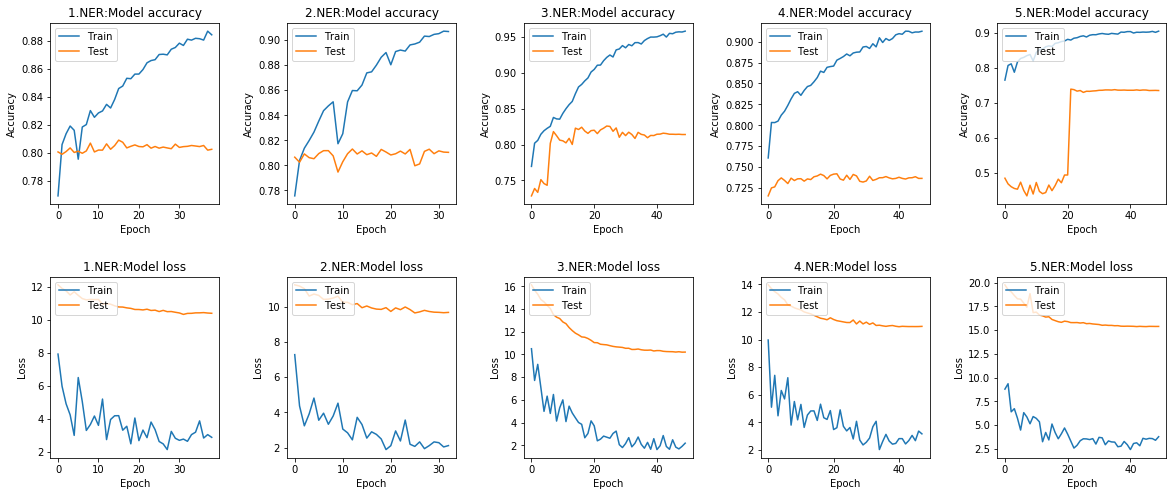

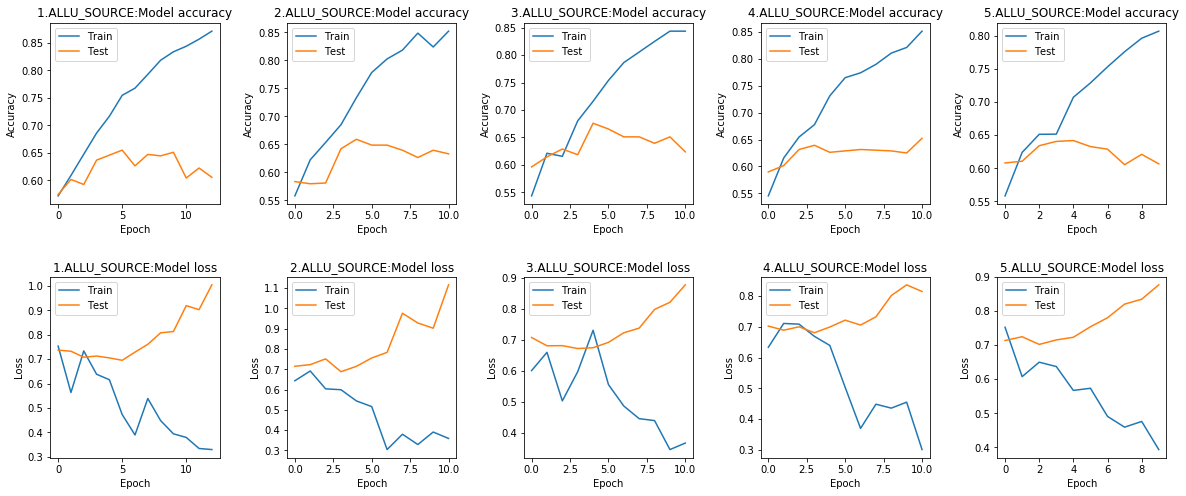

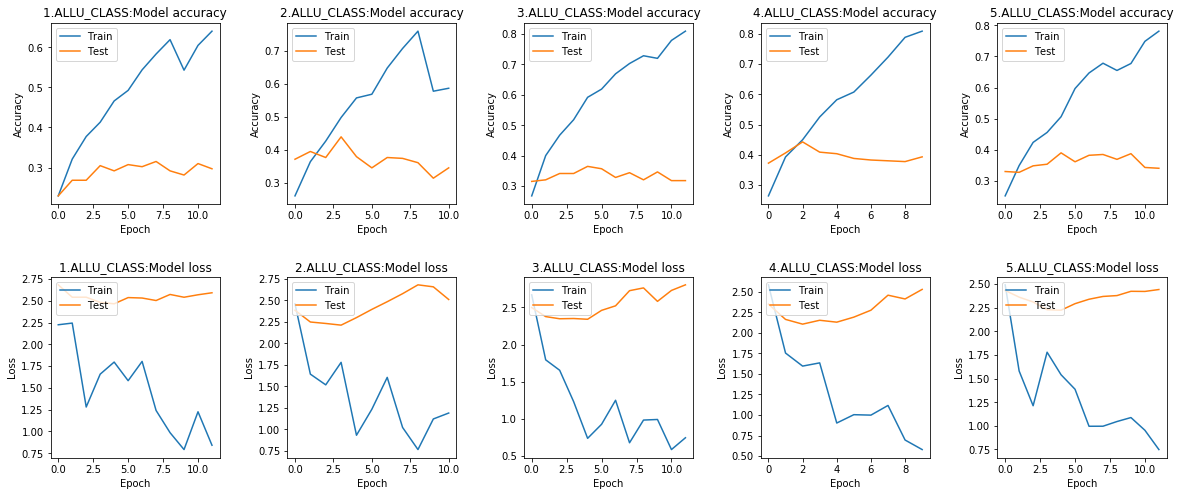

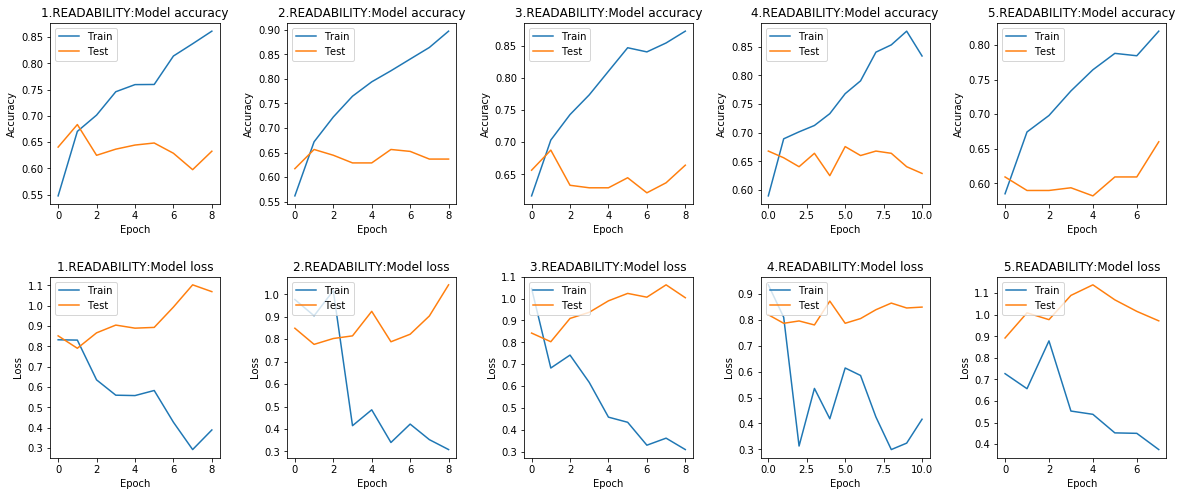

In [5]:
compute_mean_metrics(final_res)
plot_final_res(final_res)